In [10]:
import re
import string
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [11]:

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Load the dataset into a Pandas DataFrame
dataset_path = r"C:\\Users\\surya\\Downloads\\Tweets_data.csv"  
df = pd.read_csv(dataset_path)

# Display the first few rows of the original DataFrame
print("Original Dataset:")
print(df.head())




Original Dataset:
      Id                                              Tweet Emotion  Score
0  10000  How the fu*k! Who the heck! moved my fridge!.....   anger  0.938
1  10001  So my Indian Uber driver just called someone t...   anger  0.896
2  10002  @DPD_UK I asked for my parcel to be delivered ...   anger  0.896
3  10003  so ef whichever butt wipe pulled the fire alar...   anger  0.896
4  10004  Don't join @BTCare they put the phone down on ...   anger  0.896


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [22]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)

    # POS tagging
    pos_tags = pos_tag(tokens)

    # Remove stopwords after POS tagging
    stop_words = set(stopwords.words('english'))
    pos_tags = [(word, tag) for word, tag in pos_tags if word.lower() not in stop_words]

    # Lemmatization without stemming
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word, tag in pos_tags]

    # Reassemble the text
    processed_text = ' '.join(tokens)

    return processed_text

# Example usage:



In [23]:
# Apply text preprocessing to the 'text' column in the DataFrame
df['processed_text'] = df['Tweet'].apply(preprocess_text)

# Display the first few rows of the DataFrame after preprocessing
print("\nDataset after Preprocessing:")
print(df[['Tweet', 'processed_text']].head())



Dataset after Preprocessing:
                                               Tweet  \
0  How the fu*k! Who the heck! moved my fridge!.....   
1  So my Indian Uber driver just called someone t...   
2  @DPD_UK I asked for my parcel to be delivered ...   
3  so ef whichever butt wipe pulled the fire alar...   
4  Don't join @BTCare they put the phone down on ...   

                                      processed_text  
0  fu * k ! heck ! moved fridge ! ... knock landl...  
1  Indian Uber driver called someone N word . n't...  
2  @ DPD_UK asked parcel delivered pick store add...  
3  ef whichever butt wipe pulled fire alarm davis...  
4  n't join @ BTCare put phone , talk rude . Taki...  


In [24]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['processed_text'], df['Emotion'], test_size=0.2, random_state=42
)

# Further processing (e.g., vectorization) can be done based on your specific ML task



# ...

# Replace CountVectorizer with TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


# Now you can use X_train_vectorized and X_test_vectorized for training and testing your ML model



In [25]:
# Display the shape of the vectorized data
# Display the shape of the vectorized data
print("\nShape of Vectorized Data:")
print(X_train_tfidf.shape)



Shape of Vectorized Data:
(5677, 13340)


In [26]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_predict



In [15]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/74/02/5ad29a2a3d193a87d5a05fb7fd3b4e30b8eb6db7a9ddbe193beb7053978f/lightgbm-4.2.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 660.6 kB/s eta 0:00:02
   --- ------------------------------------ 0.1/1.3 MB 1.4 MB/s eta 0:00:01
   ------- -------------------------------- 0.3/1.3 MB 2.0 MB/s eta 0:00:01
   ----------- ---------------------------- 0.4/1.3 MB 2.3 MB/s eta 0:00:01
   ---------------- ----------------------- 0.6/1.3 MB 2.5 MB/s eta 0:00:01
   -------------------- ------------------- 0.7/1.3 MB 2.4 MB/s eta 0:00:01
   -------------------------- ------------- 0.9/1.3 MB 2.7 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.3 MB 2.7 MB/s eta 0:00:01
   --------------------------------- ------ 1.1/1.3 MB 2.7 MB/s eta 0:00:01
   ---------------------------------- 

In [38]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, VotingClassifier, RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Initialize individual models
svm_model = SVC(kernel='linear')
nb_model = MultinomialNB()
dt_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()

# Create a stacking classifier

# Define a list of models
models = [svm_model, nb_model, dt_model, rf_model, xgb_model, lgbm_model]
model_names = ['SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM']

# Add ensemble models
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
bagging_model = BaggingClassifier(n_estimators=50, random_state=42)
voting_model = VotingClassifier(estimators=[
    ('svm', svm_model), ('nb', nb_model), ('dt', dt_model),
    ('rf', rf_model), ('xgb', xgb_model), ('lgbm', lgbm_model),
    ('ada', ada_model), ('gb', gb_model), ('bagging', bagging_model)],
    voting='hard')

models.extend([ada_model, gb_model, bagging_model, voting_model])
model_names.extend(['AdaBoost', 'Gradient Boosting', 'Bagging', 'Voting Classifier'])

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels in both training and testing sets
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Your existing code for initializing models and performing evaluations
# ...

# Continue with your existing code

# Evaluate each model
for model, name in zip(models, model_names):
    # Using cross-validation for evaluation
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    # Ensure that you use the encoded labels for training
    scores = cross_val_score(model, X_train_tfidf, y_train_encoded, cv=kfold, scoring='accuracy')
    
    print(f"\n{name} Cross-Validation Scores:")
    print("Mean Accuracy: {:.2f}%".format(scores.mean() * 100))
    print("Standard Deviation: {:.2f}".format(scores.std()))

    # Optionally, you can train on the entire training set and evaluate on the test set
    model.fit(X_train_tfidf, y_train_encoded)
    y_pred_encoded = model.predict(X_test_tfidf)
    
    # Transform the predicted labels back to original classes
    y_pred = label_encoder.inverse_transform(y_pred_encoded)
    
    print("\n{} Test Set Performance:".format(name))
    print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
    print("Classification Report:\n", classification_report(y_test, y_pred))




SVM Cross-Validation Scores:
Mean Accuracy: 86.40%
Standard Deviation: 0.00

SVM Test Set Performance:
Accuracy: 88.10%
Classification Report:
               precision    recall  f1-score   support

       anger       0.90      0.87      0.89       361
        fear       0.85      0.91      0.88       440
         joy       0.95      0.94      0.95       324
     sadness       0.82      0.78      0.80       295

    accuracy                           0.88      1420
   macro avg       0.88      0.88      0.88      1420
weighted avg       0.88      0.88      0.88      1420


Naive Bayes Cross-Validation Scores:
Mean Accuracy: 76.68%
Standard Deviation: 0.01

Naive Bayes Test Set Performance:
Accuracy: 77.25%
Classification Report:
               precision    recall  f1-score   support

       anger       0.90      0.75      0.82       361
        fear       0.64      0.95      0.76       440
         joy       0.94      0.77      0.84       324
     sadness       0.81      0.55      0.6

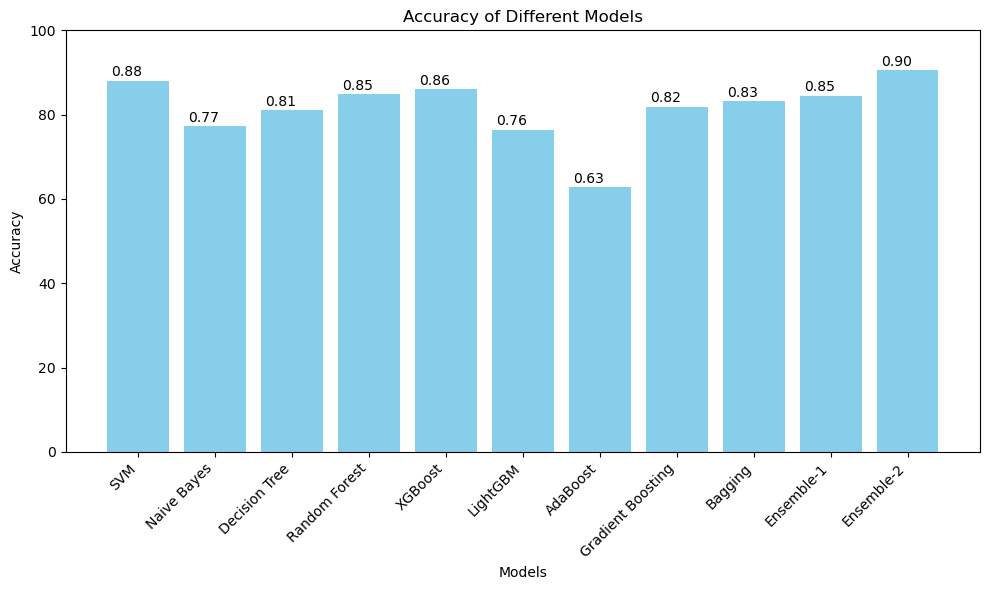

In [45]:
acc=[88.10,77.25,81.06,84.79,86.06,76.43,62.75,81.90,83.24,84.51,90.49]
models = ['SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'XGBoost', 'LightGBM', 'AdaBoost', 'Gradient Boosting', 'Bagging', 'Ensemble-1', 'Ensemble-2']

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(models, acc, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.ylim(0, 100)
plt.xticks(rotation=45, ha='right')

# Adding accuracy values on top of the bars
for bar, accuracy in zip(bars, acc):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 1, f'{accuracy / 100:.2f}', ha='center')

plt.tight_layout()

# Show the plot
plt.show()


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels in both training and testing sets
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Initialize individual models
svm_model = SVC(kernel='linear', probability=True)  # Set probability=True for soft voting
xgb_model = XGBClassifier()

# Hyperparameter tuning for SVM
param_grid_svm = {'C': [0.1, 1, 10]}
grid_search_svm = GridSearchCV(svm_model, param_grid_svm, cv=3)
grid_search_svm.fit(X_train_tfidf, y_train_encoded)
svm_model_tuned = grid_search_svm.best_estimator_

# Hyperparameter tuning for XGBoost
param_grid_xgb = {'n_estimators': [50, 100, 200]}
grid_search_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3)
grid_search_xgb.fit(X_train_tfidf, y_train_encoded)
xgb_model_tuned = grid_search_xgb.best_estimator_

# Create a voting classifier with soft voting
ensemble_model = VotingClassifier(
    estimators=[('svm', svm_model_tuned), ('xgb', xgb_model_tuned)],
    voting='soft'  # Use 'soft' for probability-based voting
)

# Fit the ensemble model
ensemble_model.fit(X_train_tfidf, y_train_encoded)

# Evaluate the ensemble model
y_pred_encoded = ensemble_model.predict(X_test_tfidf)

# Transform the predicted labels back to original classes
y_pred = label_encoder.inverse_transform(y_pred_encoded)

print("Ensemble Model (SVM + XGBoost) Test Set Performance:")
print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("Classification Report:\n", classification_report(y_test, y_pred))


Ensemble Model (SVM + XGBoost) Test Set Performance:
Accuracy: 90.35%
Classification Report:
               precision    recall  f1-score   support

       anger       0.93      0.89      0.91       361
        fear       0.89      0.93      0.91       440
         joy       0.96      0.97      0.96       324
     sadness       0.84      0.82      0.83       295

    accuracy                           0.90      1420
   macro avg       0.90      0.90      0.90      1420
weighted avg       0.90      0.90      0.90      1420



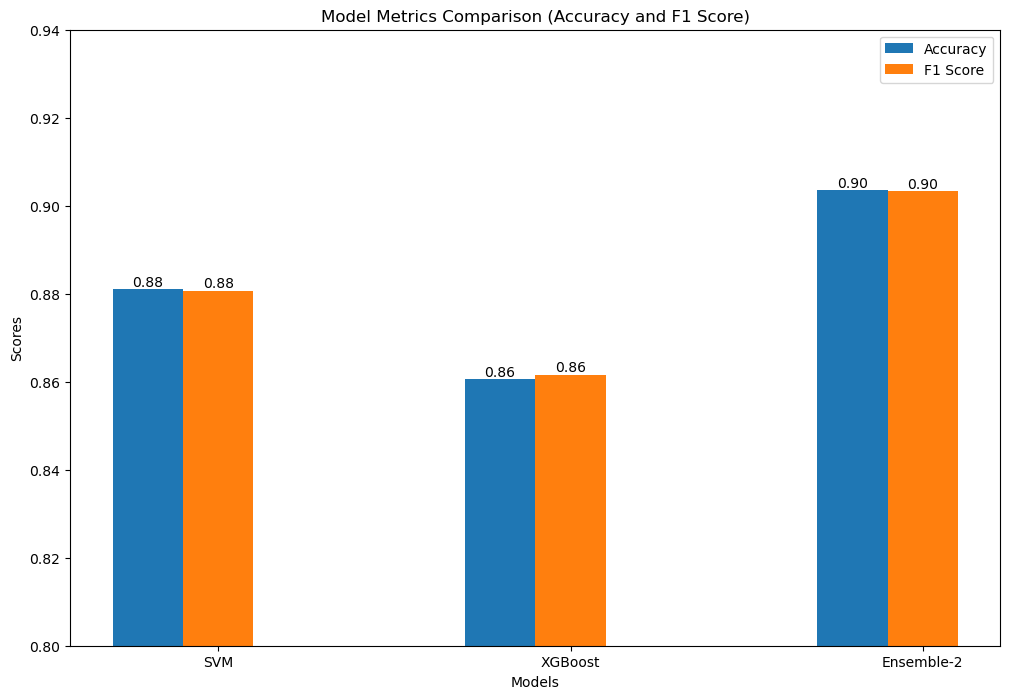

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Calculate accuracy and F1 score for individual models
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    _, _, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted')
    return accuracy, f1

# Model predictions
svm_pred = label_encoder.inverse_transform(svm_model_tuned.predict(X_test_tfidf))
xgb_pred = label_encoder.inverse_transform(xgb_model_tuned.predict(X_test_tfidf))
ensemble_pred = y_pred

# Calculate metrics for each model
svm_metrics = calculate_metrics(y_test, svm_pred)
xgb_metrics = calculate_metrics(y_test, xgb_pred)
ensemble_metrics = calculate_metrics(y_test, ensemble_pred)

# Plotting for Accuracy and F1 Score
models = ['SVM', 'XGBoost', 'Ensemble-2']
metrics = ['Accuracy', 'F1 Score']
values = [svm_metrics, xgb_metrics, ensemble_metrics]

bar_width = 0.2
index = np.arange(len(models))

fig, ax = plt.subplots(figsize=(12, 8))

for i, metric in enumerate(metrics):
    bars = ax.bar(index + i * bar_width, [v[i] for v in values], bar_width, label=metric)
    for bar, value in zip(bars, [v[i] for v in values]):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{value:.2f}', ha='center', va='bottom')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Metrics Comparison (Accuracy and F1 Score)')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(models)
ax.legend()

# Set the y-axis limits to 0.8-0.94
ax.set_ylim(0.8, 0.94)

plt.show()
